In [1]:
url = 'https://www.kaggle.com/aaronschlegel/austin-animal-center-shelter-outcomes-and'

In [2]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#Only using data from one large shelter so that adoption policies and strategies are the same 
austin_raw_data = pd.read_csv('raw_data/aac_intakes_outcomes.csv')

# 1. Selecting columns and dogs as animal type

In [4]:
austin_raw_data.columns

Index(['age_upon_outcome', 'animal_id_outcome', 'date_of_birth',
       'outcome_subtype', 'outcome_type', 'sex_upon_outcome',
       'age_upon_outcome_(days)', 'age_upon_outcome_(years)',
       'age_upon_outcome_age_group', 'outcome_datetime', 'outcome_month',
       'outcome_year', 'outcome_monthyear', 'outcome_weekday', 'outcome_hour',
       'outcome_number', 'dob_year', 'dob_month', 'dob_monthyear',
       'age_upon_intake', 'animal_id_intake', 'animal_type', 'breed', 'color',
       'found_location', 'intake_condition', 'intake_type', 'sex_upon_intake',
       'count', 'age_upon_intake_(days)', 'age_upon_intake_(years)',
       'age_upon_intake_age_group', 'intake_datetime', 'intake_month',
       'intake_year', 'intake_monthyear', 'intake_weekday', 'intake_hour',
       'intake_number', 'time_in_shelter', 'time_in_shelter_days'],
      dtype='object')

In [5]:
#how many animal types are included?
austin_raw_data['animal_type'].unique()

array(['Dog', 'Cat', 'Other', 'Bird'], dtype=object)

In [6]:
#only select dogs
austin_data = austin_raw_data[austin_raw_data['animal_type'] == 'Dog']
austin_data.head()

,age_upon_outcome,animal_id_outcome,date_of_birth,outcome_subtype,outcome_type,sex_upon_outcome,age_upon_outcome_(days),age_upon_outcome_(years),age_upon_outcome_age_group,outcome_datetime,...,age_upon_intake_age_group,intake_datetime,intake_month,intake_year,intake_monthyear,intake_weekday,intake_hour,intake_number,time_in_shelter,time_in_shelter_days
0,10 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,3650,10.0,"(7.5, 10.0]",2017-12-07 14:07:00,...,"(7.5, 10.0]",2017-12-07 00:00:00,12,2017,2017-12,Thursday,14,1.0,0 days 14:07:00.000000000,0.588194
1,7 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2555,7.0,"(5.0, 7.5]",2014-12-20 16:35:00,...,"(5.0, 7.5]",2014-12-19 10:21:00,12,2014,2014-12,Friday,10,2.0,1 days 06:14:00.000000000,1.259722
2,6 years,A006100,2007-07-09 00:00:00,NaN,Return to Owner,Neutered Male,2190,6.0,"(5.0, 7.5]",2014-03-08 17:10:00,...,"(5.0, 7.5]",2014-03-07 14:26:00,3,2014,2014-03,Friday,14,3.0,1 days 02:44:00.000000000,1.113889
3,10 years,A047759,2004-04-02 00:00:00,Partner,Transfer,Neutered Male,3650,10.0,"(7.5, 10.0]",2014-04-07 15:12:00,...,"(7.5, 10.0]",2014-04-02 15:55:00,4,2014,2014-04,Wednesday,15,1.0,4 days 23:17:00.000000000,4.970139
4,16 years,A134067,1997-10-16 00:00:00,NaN,Return to Owner,Neutered Male,5840,16.0,"(15.0, 17.5]",2013-11-16 11:54:00,...,"(15.0, 17.5]",2013-11-16 09:02:00,11,2013,2013-11,Saturday,9,1.0,0 days 02:52:00.000000000,0.119444


In [7]:
#drop redundant, irrelevant or columns missing many values 
new_columns = ['outcome_type', 'animal_id_intake',
        'age_upon_outcome_(years)',
       'outcome_datetime',
       'outcome_monthyear',  'animal_type', 'breed', 'color',
       'intake_condition', 'intake_type', 'sex_upon_outcome',
       'age_upon_intake_(years)',
        'intake_datetime', 
        'intake_monthyear', 
       'intake_number', 'time_in_shelter_days'] 

In [8]:
austin_data = austin_data.loc[:, new_columns]
austin_data.head()

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days
0,Return to Owner,A006100,10.0,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10.0,2017-12-07 00:00:00,2017-12,1.0,0.588194
1,Return to Owner,A006100,7.0,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7.0,2014-12-19 10:21:00,2014-12,2.0,1.259722
2,Return to Owner,A006100,6.0,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6.0,2014-03-07 14:26:00,2014-03,3.0,1.113889
3,Transfer,A047759,10.0,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10.0,2014-04-02 15:55:00,2014-04,1.0,4.970139
4,Return to Owner,A134067,16.0,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16.0,2013-11-16 09:02:00,2013-11,1.0,0.119444


In [9]:
austin_data.shape

(45366, 16)

# 2. Viewing and changing data types

In [10]:
austin_data.dtypes

outcome_type                 object
animal_id_intake             object
age_upon_outcome_(years)    float64
outcome_datetime             object
outcome_monthyear            object
animal_type                  object
breed                        object
color                        object
intake_condition             object
intake_type                  object
sex_upon_outcome             object
age_upon_intake_(years)     float64
intake_datetime              object
intake_monthyear             object
intake_number               float64
time_in_shelter_days        float64
dtype: object

In [11]:
#convert intake and outcome dates to datetime objects 
#time of year may play into number of adoptions
austin_data[['outcome_datetime', 'intake_datetime']] = austin_data[['outcome_datetime', 'intake_datetime']].apply(pd.to_datetime, format = '%Y/%m/%d', errors = 'coerce')
austin_data.dtypes

outcome_type                        object
animal_id_intake                    object
age_upon_outcome_(years)           float64
outcome_datetime            datetime64[ns]
outcome_monthyear                   object
animal_type                         object
breed                               object
color                               object
intake_condition                    object
intake_type                         object
sex_upon_outcome                    object
age_upon_intake_(years)            float64
intake_datetime             datetime64[ns]
intake_monthyear                    object
intake_number                      float64
time_in_shelter_days               float64
dtype: object

In [12]:
austin_data[['age_upon_outcome_(years)', 'age_upon_intake_(years)']] = austin_data[['age_upon_outcome_(years)', 'age_upon_intake_(years)']].astype(int)

# 3. Exploring 

In [13]:
#what are the different outcome types
austin_data['outcome_type'].unique()

array(['Return to Owner', 'Transfer', 'Adoption', 'Euthanasia', 'Died',
       'Rto-Adopt', 'Missing', 'Disposal', nan], dtype=object)

In [14]:
#checking out breed column
austin_data['breed'].nunique()

1919

In [15]:
#the majority are followed by 'mix' 
austin_data['breed'].value_counts().head(30)

Pit Bull Mix                     6256
Chihuahua Shorthair Mix          4831
Labrador Retriever Mix           4789
German Shepherd Mix              1950
Australian Cattle Dog Mix        1099
Dachshund Mix                     811
Boxer Mix                         683
Border Collie Mix                 662
Miniature Poodle Mix              662
Catahoula Mix                     480
Rat Terrier Mix                   469
Australian Shepherd Mix           468
Yorkshire Terrier Mix             447
Siberian Husky Mix                441
Jack Russell Terrier Mix          429
Miniature Schnauzer Mix           402
Beagle Mix                        392
Staffordshire Mix                 375
Chihuahua Longhair Mix            371
Great Pyrenees Mix                349
Cairn Terrier Mix                 348
Pointer Mix                       336
Rottweiler Mix                    325
American Bulldog Mix              318
Shih Tzu Mix                      292
Anatol Shepherd Mix               253
Plott Hound 

In [16]:
#taking only the first breed listed 
austin_data['breed'] = austin_data['breed'].astype(str)
austin_data['new_breed'] = austin_data['breed'].str.split("/").str[0]
austin_data['new_breed'] = austin_data['new_breed'].str.replace(' Mix', '')
austin_data['new_breed'].nunique()

197

In [17]:
austin_data.groupby('new_breed')['animal_id_intake'].nunique().sort_values(ascending=False).head(20)

new_breed
Pit Bull                 5467
Labrador Retriever       5374
Chihuahua Shorthair      5203
German Shepherd          2193
Australian Cattle Dog    1255
Dachshund                1142
Boxer                     793
Border Collie             787
Miniature Poodle          740
Yorkshire Terrier         583
Australian Shepherd       559
Jack Russell Terrier      556
Beagle                    541
Catahoula                 530
Miniature Schnauzer       526
Rat Terrier               522
Siberian Husky            518
Great Pyrenees            452
Shih Tzu                  436
Rottweiler                414
Name: animal_id_intake, dtype: int64

In [18]:
#checking out colors
austin_data['color'].value_counts()

Black/White                  5201
Black                        2507
Brown/White                  2463
Tan/White                    2450
White                        2366
                             ... 
Brown Brindle/Brown Merle       1
Brown/Red Merle                 1
Liver Tick/White                1
Chocolate/Liver Tick            1
Gray/Fawn                       1
Name: color, Length: 337, dtype: int64

In [19]:
#taking only the first color listed assuming that is the primary color
austin_data['color'] = austin_data['color'].astype(str)
austin_data['new_color'] = austin_data['color'].str.split("/").str[0]

print(austin_data['new_color'].nunique(), austin_data['color'].nunique())

36 337


In [20]:
austin_data.count()

outcome_type                45364
animal_id_intake            45366
age_upon_outcome_(years)    45366
outcome_datetime            45366
outcome_monthyear           45366
animal_type                 45366
breed                       45366
color                       45366
intake_condition            45366
intake_type                 45366
sex_upon_outcome            45365
age_upon_intake_(years)     45366
intake_datetime             45366
intake_monthyear            45366
intake_number               45366
time_in_shelter_days        45366
new_breed                   45366
new_color                   45366
dtype: int64

# 4. Handling null values

In [21]:
#finding null values
austin_data.columns[austin_data.isna().any()]

Index(['outcome_type', 'sex_upon_outcome'], dtype='object')

In [22]:
#dropping these becasue without the outcome the dog information is not much use 
austin_data[austin_data['outcome_type'].isna()]

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color
44097,NaN,A718046,10,2016-03-26 14:22:00,2016-03,Dog,Chihuahua Longhair Mix,Cream,Normal,Public Assist,Neutered Male,10,2016-03-26 00:00:00,2016-03,1.0,0.598611,Chihuahua Longhair,Cream
59034,NaN,A737930,0,2016-11-17 10:59:00,2016-11,Dog,Pit Bull Mix,Fawn/White,Normal,Public Assist,Intact Male,0,2016-11-09 15:01:00,2016-11,2.0,7.831944,Pit Bull,Fawn


In [23]:
#dropping this beacuse its only one and is an owner surrender and then returned to owner
austin_data[austin_data['sex_upon_outcome'].isna()]

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color
6523,Return to Owner,A667395,7,2013-11-27 16:11:00,2013-11,Dog,Dachshund,Brown Merle,Normal,Owner Surrender,NaN,7,2013-11-17 13:15:00,2013-11,1.0,10.122222,Dachshund,Brown Merle


In [24]:
#new dataframe with dropped columns and no null values
df = austin_data[austin_data[['outcome_type', 'sex_upon_outcome']].notnull().all(1)]
df.head()

,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color
0,Return to Owner,A006100,10,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow
1,Return to Owner,A006100,7,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow
2,Return to Owner,A006100,6,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow
3,Transfer,A047759,10,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor
4,Return to Owner,A134067,16,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown


# 5. Convert str variables to int

In [25]:
#create function to form dictonary to create int variables
def create_dict(items):
        return {v: i for i, v in enumerate(items, 0)}

In [26]:
#create variable to apply function to
condition = df['intake_condition'].unique().tolist()

In [27]:
#make dict
create_dict(condition)

{'Normal': 0,
 'Injured': 1,
 'Aged': 2,
 'Sick': 3,
 'Other': 4,
 'Pregnant': 5,
 'Nursing': 6,
 'Feral': 7}

In [28]:
#map to new column
df['intake_cond_int']=df['intake_condition'].map(create_dict(condition))
df.head()

<ipython-input-28-ab6c0b329468>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intake_cond_int']=df['intake_condition'].map(create_dict(condition))


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int
0,Return to Owner,A006100,10,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow,0
1,Return to Owner,A006100,7,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow,0
2,Return to Owner,A006100,6,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow,0
3,Transfer,A047759,10,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor,0
4,Return to Owner,A134067,16,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown,1


In [29]:
#intake type to int
intake_type = df['intake_type'].unique().tolist()
create_dict(intake_type)
df['intake_type_int']=df['intake_type'].map(create_dict(intake_type))
df.head()

<ipython-input-29-34a5c7ff41d1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['intake_type_int']=df['intake_type'].map(create_dict(intake_type))


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int
0,Return to Owner,A006100,10,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,Neutered Male,10,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow,0,0
1,Return to Owner,A006100,7,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,7,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow,0,1
2,Return to Owner,A006100,6,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,Neutered Male,6,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow,0,1
3,Transfer,A047759,10,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,Neutered Male,10,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor,0,2
4,Return to Owner,A134067,16,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,Neutered Male,16,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown,1,1


In [30]:
df['sex_upon_outcome'].unique()

array(['Neutered Male', 'Spayed Female', 'Intact Female', 'Intact Male',
       'Unknown'], dtype=object)

In [31]:
sex_upon_outcome = df['sex_upon_outcome'].unique().tolist()
create_dict(sex_upon_outcome)
df['sex_upon_outcome_int']=df['sex_upon_outcome'].map(create_dict(sex_upon_outcome))
df.head()

<ipython-input-31-c17472e67a89>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex_upon_outcome_int']=df['sex_upon_outcome'].map(create_dict(sex_upon_outcome))


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,...,age_upon_intake_(years),intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int
0,Return to Owner,A006100,10,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,...,10,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow,0,0,0
1,Return to Owner,A006100,7,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,...,7,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow,0,1,0
2,Return to Owner,A006100,6,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,...,6,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow,0,1,0
3,Transfer,A047759,10,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,...,10,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor,0,2,0
4,Return to Owner,A134067,16,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,...,16,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown,1,1,0


In [32]:
#new column with outcome type as int (0-7) (the hard way)
outcomes = {'Return to Owner':0, 'Transfer':1,'Adoption':2, 'Euthanasia':3, 'Died':4, 'Rto-Adopt':5, 'Missing':6, 'Disposal':7}
df['outcome_type_int'] = df['outcome_type'].map(outcomes)
df.head()

<ipython-input-32-d86445a09f53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['outcome_type_int'] = df['outcome_type'].map(outcomes)


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,...,intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int,outcome_type_int
0,Return to Owner,A006100,10,2017-12-07 14:07:00,2017-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Stray,...,2017-12-07 00:00:00,2017-12,1.0,0.588194,Spinone Italiano,Yellow,0,0,0,0
1,Return to Owner,A006100,7,2014-12-20 16:35:00,2014-12,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,...,2014-12-19 10:21:00,2014-12,2.0,1.259722,Spinone Italiano,Yellow,0,1,0,0
2,Return to Owner,A006100,6,2014-03-08 17:10:00,2014-03,Dog,Spinone Italiano Mix,Yellow/White,Normal,Public Assist,...,2014-03-07 14:26:00,2014-03,3.0,1.113889,Spinone Italiano,Yellow,0,1,0,0
3,Transfer,A047759,10,2014-04-07 15:12:00,2014-04,Dog,Dachshund,Tricolor,Normal,Owner Surrender,...,2014-04-02 15:55:00,2014-04,1.0,4.970139,Dachshund,Tricolor,0,2,0,1
4,Return to Owner,A134067,16,2013-11-16 11:54:00,2013-11,Dog,Shetland Sheepdog,Brown/White,Injured,Public Assist,...,2013-11-16 09:02:00,2013-11,1.0,0.119444,Shetland Sheepdog,Brown,1,1,0,0


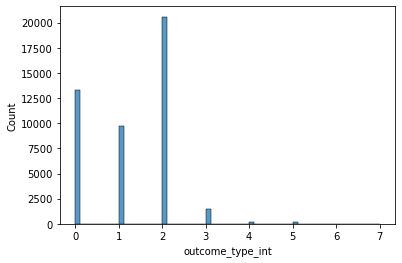

<Figure size 576x288 with 0 Axes>

In [33]:
_ = sns.histplot( x=  df['outcome_type_int'])
plt.figure(figsize=(8, 4))
plt.show()

In [34]:
df.shape

(45363, 22)

In [35]:
# dropping uncommon outcome types 3-7 (Euthanasia, Died, RTO-Adopt, Missing, Disposal)
df = df[df['outcome_type_int']<= 2]
df['outcome_type'].unique()

array(['Return to Owner', 'Transfer', 'Adoption'], dtype=object)

In [36]:
#Also dropping return to owner, because these dogs were likely never eligable for adoption. 
df = df[df['outcome_type_int']!= 0]
df['outcome_type'].unique()

array(['Transfer', 'Adoption'], dtype=object)

In [37]:
#animal IDs have duplicates.. are they the same dog or is this a mistake?
duplicates = df[df['animal_id_intake'].duplicated(keep=False)==True]
duplicates.head() #they are the same dog


,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,breed,color,intake_condition,intake_type,...,intake_datetime,intake_monthyear,intake_number,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int,outcome_type_int
204,Adoption,A378348,9,2014-04-23 07:43:00,2014-04,Dog,German Shepherd Mix,Black/Brown,Normal,Owner Surrender,...,2014-01-25 14:38:00,2014-01,1.0,87.711806,German Shepherd,Black,0,2,0,2
205,Adoption,A378348,9,2014-01-19 13:39:00,2014-01,Dog,German Shepherd Mix,Black/Brown,Normal,Owner Surrender,...,2013-12-12 11:07:00,2013-12,2.0,38.105556,German Shepherd,Black,0,2,0,2
231,Adoption,A390222,9,2013-12-15 17:10:00,2013-12,Dog,Jack Russell Terrier,White/Tan,Normal,Owner Surrender,...,2013-12-08 17:04:00,2013-12,1.0,7.004167,Jack Russell Terrier,White,0,2,1,2
232,Adoption,A390222,9,2013-12-08 15:16:00,2013-12,Dog,Jack Russell Terrier,White/Tan,Normal,Owner Surrender,...,2013-12-04 18:24:00,2013-12,2.0,3.869444,Jack Russell Terrier,White,0,2,1,2
319,Adoption,A438287,14,2018-01-13 17:54:00,2018-01,Dog,Chihuahua Shorthair Mix,Tan,Normal,Owner Surrender,...,2018-01-08 12:03:00,2018-01,1.0,5.243750,Chihuahua Shorthair,Tan,0,2,1,2


In [38]:
#group colors that are the same (brown = chocolate = liver, yellow = fawn, etc.)
df['new_color'] = df['new_color'].astype(str)
df['new_color'] = df['new_color'].str.replace('Chocolate', 'Brown')
df['new_color'] = df['new_color'].str.replace('Liver', 'Brown')
df['new_color'] = df['new_color'].str.replace('Fawn', 'Yellow')
df['new_color'] = df['new_color'].str.replace('Silver', 'Gray')
df['new_color'] = df['new_color'].str.replace('Cream', 'White')


In [39]:
#drop colors that make up less than 1% of the data

colors = ['Black', 'Blue', 'Brown', 'Brown Brindle', 'Buff', 'Gray', 'Red', 'Sable', 'Tan', 'Tricolor', 'White', 'Yellow']
df = df[df['new_color'].isin(colors)]
df['new_color'].unique() #all the colors left

array(['Tricolor', 'Black', 'Tan', 'Sable', 'Gray', 'Brown', 'Blue',
       'Red', 'White', 'Brown Brindle', 'Yellow', 'Buff'], dtype=object)

In [40]:
#taking 80% of the data by dropping the least common breeds to reduce noise(drop approx 5,840 rows)
print(df['new_breed'].value_counts().sort_values(ascending=False).head(27).sum())#top 27 represent 80%
top27 = df['new_breed'].value_counts().sort_values(ascending=False).head(27).index.tolist()
df = df[df['new_breed'].isin(top27)] #new df 
df.shape


23298


(23298, 22)

In [41]:
#drop original color and breed columns
df = df.drop(columns=['breed' ,'color', 'animal_id_intake', 'intake_number', ])

In [42]:
#breed and color coulmns to int (for visualizations)
new_breed_int = df['new_breed'].unique().tolist()
create_dict(new_breed_int)
df['new_breed_int']=df['new_breed'].map(create_dict(new_breed_int))

new_color_int = df['new_color'].unique().tolist()
create_dict(new_color_int)
df['new_color_int']=df['new_color'].map(create_dict(new_color_int))
df.head()

,outcome_type,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,age_upon_intake_(years),intake_datetime,intake_monthyear,time_in_shelter_days,new_breed,new_color,intake_cond_int,intake_type_int,sex_upon_outcome_int,outcome_type_int,new_breed_int,new_color_int
3,Transfer,10,2014-04-07 15:12:00,2014-04,Dog,Normal,Owner Surrender,Neutered Male,10,2014-04-02 15:55:00,2014-04,4.970139,Dachshund,Tricolor,0,2,0,1,0,0
12,Adoption,16,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,16,2013-10-03 15:47:00,2013-10,49.747917,Dachshund,Black,0,2,0,2,0,1
14,Adoption,17,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,17,2016-09-28 12:05:00,2016-09,9.020139,Chihuahua Shorthair,Tan,2,1,0,2,1,2
22,Adoption,15,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,15,2015-10-06 12:29:00,2015-10,23.104861,Labrador Retriever,Sable,0,0,0,2,2,3
28,Transfer,15,2016-06-17 12:37:00,2016-06,Dog,Normal,Stray,Neutered Male,15,2016-06-09 16:22:00,2016-06,7.843750,Rat Terrier,Gray,0,0,0,1,3,4


In [43]:
df.columns

Index(['outcome_type', 'age_upon_outcome_(years)', 'outcome_datetime',
       'outcome_monthyear', 'animal_type', 'intake_condition', 'intake_type',
       'sex_upon_outcome', 'age_upon_intake_(years)', 'intake_datetime',
       'intake_monthyear', 'time_in_shelter_days', 'new_breed', 'new_color',
       'intake_cond_int', 'intake_type_int', 'sex_upon_outcome_int',
       'outcome_type_int', 'new_breed_int', 'new_color_int'],
      dtype='object')

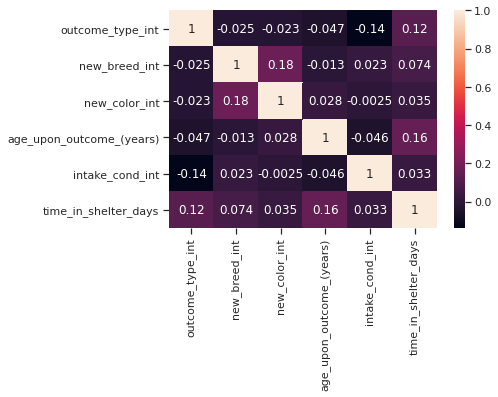

In [44]:
#heatmap looking for any correlated data
plot_data = df[[ 'outcome_type_int', 'new_breed_int', 'new_color_int','age_upon_outcome_(years)', 'intake_cond_int', 'time_in_shelter_days']]
sns.set_theme(style="ticks")

sns.heatmap(plot_data.corr(), annot=True) 
#looks like age and time in shelter have slight correlation
#breed and color also have a slight correlation--to be expected

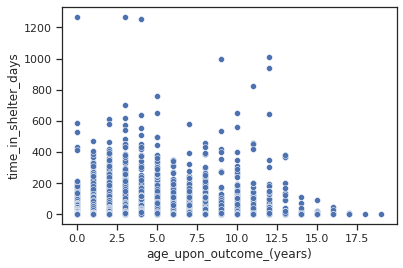

In [60]:
sns.scatterplot(x = df['age_upon_outcome_(years)'], y=df['time_in_shelter_days'])

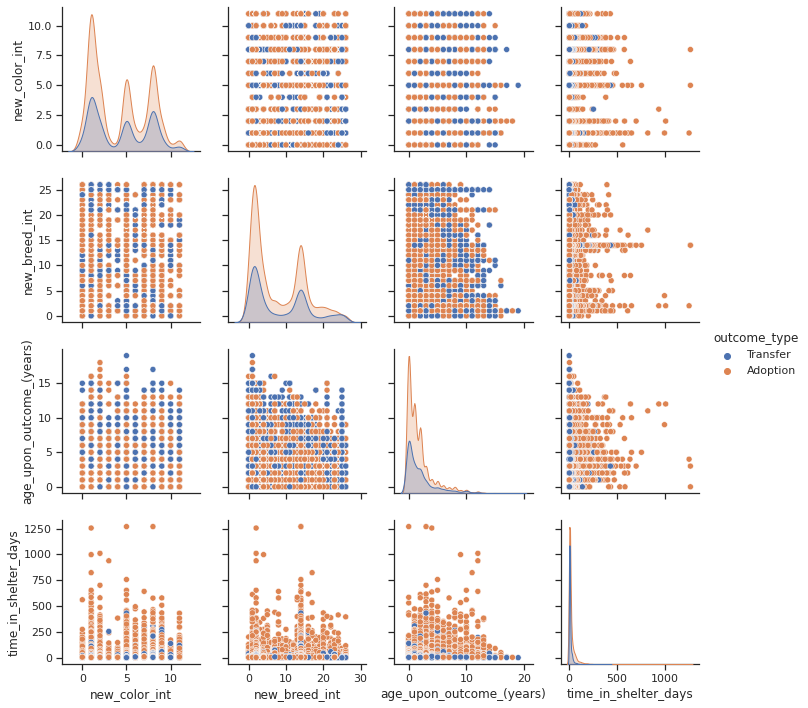

In [46]:
plot_data = df[['outcome_type', 'new_color_int', 'new_breed_int','age_upon_outcome_(years)', 'time_in_shelter_days']]
sns.set_theme(style="ticks")

sns.pairplot(plot_data, hue="outcome_type")

In [47]:
#create dummy variables
df = pd.get_dummies(df, columns=['new_breed', 'new_color'])


In [48]:
df.columns

Index(['outcome_type', 'age_upon_outcome_(years)', 'outcome_datetime',
       'outcome_monthyear', 'animal_type', 'intake_condition', 'intake_type',
       'sex_upon_outcome', 'age_upon_intake_(years)', 'intake_datetime',
       'intake_monthyear', 'time_in_shelter_days', 'intake_cond_int',
       'intake_type_int', 'sex_upon_outcome_int', 'outcome_type_int',
       'new_breed_int', 'new_color_int', 'new_breed_Anatol Shepherd',
       'new_breed_Australian Cattle Dog', 'new_breed_Australian Kelpie',
       'new_breed_Australian Shepherd', 'new_breed_Beagle',
       'new_breed_Border Collie', 'new_breed_Boxer', 'new_breed_Cairn Terrier',
       'new_breed_Catahoula', 'new_breed_Chihuahua Longhair',
       'new_breed_Chihuahua Shorthair', 'new_breed_Dachshund',
       'new_breed_German Shepherd', 'new_breed_Great Pyrenees',
       'new_breed_Jack Russell Terrier', 'new_breed_Labrador Retriever',
       'new_breed_Miniature Poodle', 'new_breed_Miniature Schnauzer',
       'new_breed_Pit B

In [49]:
df['age_upon_intake_(years)'].value_counts()

0     8907
1     4948
2     3948
3     1680
4      881
5      795
6      547
7      403
8      377
10     276
9      215
12     127
11      90
13      40
15      31
14      23
16       5
17       3
19       1
18       1
Name: age_upon_intake_(years), dtype: int64

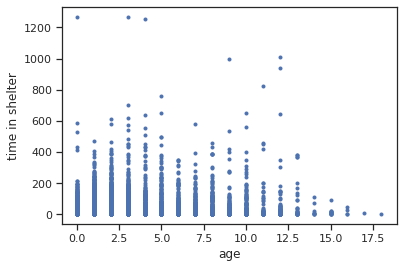

In [57]:
a = df[df['outcome_type'] == 'Adoption']['age_upon_outcome_(years)']
data = df[df['outcome_type'] == 'Adoption'] ['time_in_shelter_days']
plt.plot(a, data, marker = '.', linestyle='none')
plt.xlabel('age')
plt.ylabel('time in shelter')
plt.show()

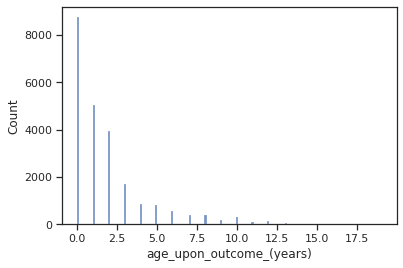

In [53]:
sns.histplot(data=df, x = 'age_upon_outcome_(years)')

In [51]:
df.to_csv('dog_adoption2')